In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [6]:
df=pd.read_csv('insurance.csv')

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [8]:
df.shape

(1338, 8)

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [11]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [12]:
s = df['bmi']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [13]:
print(len(outliers))

9


In [14]:
a=list(outliers.keys())
df.drop(a,inplace=True)

In [15]:
s = df['charges']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers1=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [16]:
print(len(outliers1))

138


In [17]:
b=list(outliers1.keys())
df.drop(b,inplace=True)

In [18]:
df.shape

(1191, 8)

In [19]:
X=df.drop('insuranceclaim',axis=1)
Y=df['insuranceclaim']

In [20]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [21]:
Y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [23]:
ss=StandardScaler()

In [24]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [25]:
model=tf.keras.Sequential([
      tf.keras.layers.Dense(1,input_shape=(X.shape[1],),activation='sigmoid')
])

In [26]:
model.compile(optimizer='sgd',loss='binary_crossentropy')

In [27]:
trained_model=model.fit(X_train_ss,Y_train,epochs=50,batch_size=20)

Epoch 1/50
42/42 [==============================] - 0s 5ms/step - loss: 0.8513
Epoch 2/50
42/42 [==============================] - 0s 4ms/step - loss: 0.7903
Epoch 3/50
42/42 [==============================] - 0s 4ms/step - loss: 0.7374
Epoch 4/50
42/42 [==============================] - 0s 4ms/step - loss: 0.6921
Epoch 5/50
42/42 [==============================] - 0s 4ms/step - loss: 0.6540
Epoch 6/50
42/42 [==============================] - 0s 4ms/step - loss: 0.6220
Epoch 7/50
42/42 [==============================] - 0s 4ms/step - loss: 0.5950
Epoch 8/50
42/42 [==============================] - 0s 4ms/step - loss: 0.5723
Epoch 9/50
42/42 [==============================] - 0s 4ms/step - loss: 0.5530
Epoch 10/50
42/42 [==============================] - 0s 4ms/step - loss: 0.5369
Epoch 11/50
42/42 [==============================] - 0s 4ms/step - loss: 0.5233
Epoch 12/50
42/42 [==============================] - 0s 4ms/step - loss: 0.5117
Epoch 13/50
42/42 [==============================

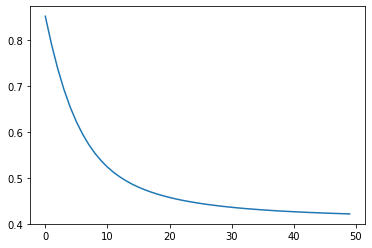

In [28]:
plt.plot(trained_model.history['loss'])

In [29]:
Y_pred=model.predict(X_test_ss)

In [30]:
Y_pred=np.where(Y_pred > 0.5,1,0)

In [31]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       162
           1       0.89      0.86      0.88       196

    accuracy                           0.87       358
   macro avg       0.86      0.87      0.87       358
weighted avg       0.87      0.87      0.87       358

